# Complexity Analysis

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import time
from dt import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

In [2]:
def create_data(N, M):
    temp = np.random.random((N, M)) >= 0.5
    return pd.DataFrame(temp)

In [3]:
N = 10
M = 10
data = create_data(N, M)
data.head(6)

,0,1,2,3,4,5,6,7,8,9
0,False,False,True,False,True,True,False,True,True,True
1,True,False,True,False,True,True,True,False,False,True
2,False,False,True,True,False,False,False,False,False,False
3,True,False,True,False,False,False,True,True,True,False
4,True,True,True,True,False,True,False,True,False,True
5,False,False,False,True,True,False,True,True,False,False


In [4]:
def timer(data, max_depth):
    dt = DecisionTreeClassifier(method = 'gini', max_depth = max_depth)
    dTrain, dTest = train_test_split(data, test_size=.3)
    start = time.time()
    dt.train(dTrain)
    end = time.time()
    train = end-start
    start = time.time()
    dt.predict(dTest.iloc[:, :-1])
    end = time.time()
    test = end-start
    return train, test

In [5]:
def foo(N, M, max_depth = 5):
    TRAIN = []
    TEST = []
    N_ = []
    M_ = []
    for n in N:
        for m in M:
            data = create_data(n, m)
            train, test = timer(data, max_depth)
            N_.append(n)
            M_.append(m)
            TRAIN.append(train)            
            TEST.append(test)
    return TRAIN, TEST, N_, M_

In [6]:
t = 5
N = [30 * i for i in range(1, t + 1)]
M = [6 * i for i in range(1, t + 1)]

In [7]:
tr, te, ns, ms = foo(N, M)

In [8]:
def plotter(z, x, y):
    ax = plt.axes(projection='3d')
    ax.set_xlabel('# of Samples')
    ax.set_ylabel('# of Features')
    ax.set_zlabel('time')
    ax.scatter3D(x, y, z, c=z, cmap='Greens')
    return ax

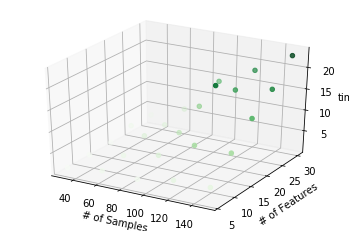

In [9]:
plotter(tr, ns, ms)

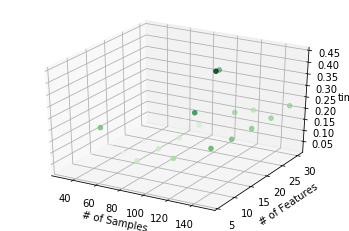

In [10]:
plotter(te, ns, ms)

### Training time
with # of samples, and wrt # of features.

In [43]:
def plotter2d(y, x, t, norm, off = 0):
    end = int(len(y)/t)
    if norm == 'n':
        y = [y[i*t + off] for i in range(end)]
        x = [x[i*t + off] for i in range(end)]
        color = 'green'
    else:
        y = [y[i + end*off] for i in range(end)]
        x = [x[i + end*off] for i in range(end)]
        color = 'orange'
    plt.plot(x, y, 'o', color=color)

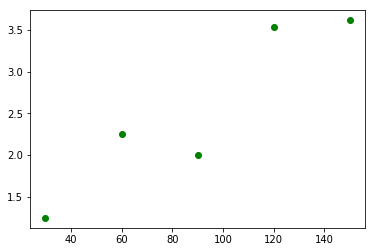

In [44]:
plotter2d(tr, ns, t, 'n') # time wrt # of samples

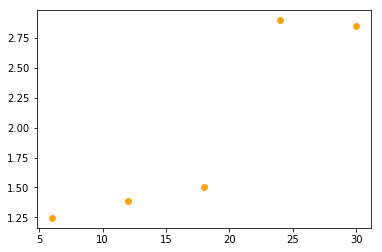

In [45]:
plotter2d(tr, ms, t, 'm') # time wrt # of features

### Testing time
with # of samples, and wrt # of features.

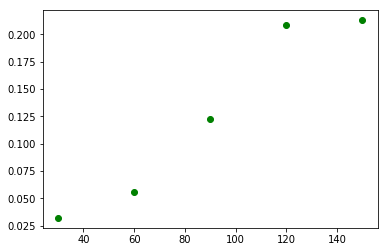

In [46]:
plotter2d(te, ns, t, 'n', off=3) # time wrt # of samples

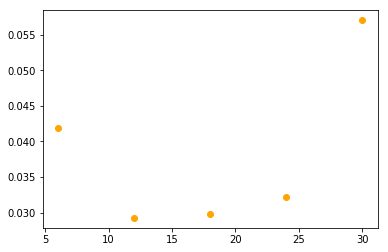

In [51]:
plotter2d(te, ms, t, 'm') # time wrt # of features